In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
wind = pd.read_csv('data/wind_new.csv', encoding='latin')
wind.sample()

,case_id,eia_id,state,county,wind_farm,year,turbine_count,project_capacity,manufact,model,turbine_capacity,hub_height,rotor_diameter,rotor_swept_area,total_height,retrofit,retrofit_year,conf_atr,conf_loc,img_date,img_source,long,lat
19832,3030519,56777.0,IN,Benton County,Fowler Ridge II,2009.0,133,199.5,GE Wind,GE1.5-77,1500.0,80.0,77.0,4656.63,118.6,0,NaN,3,3,NaN,Bing Maps Aerial,-87.443893,40.575893


In [8]:
energy = pd.read_csv('data/energy_new.csv', encoding='latin')
energy.sample()

,Unnamed: 0,Plant_Id,Combined_Heat_And\nPower_Plant,Nuclear_Unit_Id,Plant_Name,Operator_Name,Operator_Id,Plant_State,Census_Region,NERC_Region,Reserved,NAICS_Code,EIA_Sector_Number,Sector_Name,Reported\nPrime_Mover,Reported\nFuel_Type_Code,AER\nFuel_Type_Code,Balancing\nAuthority_Code,Respondent\nFrequency,Physical\nUnit_Label,Quantity\nJanuary,Quantity\nFebruary,Quantity\nMarch,Quantity\nApril,Quantity\nMay,Quantity\nJune,Quantity\nJuly,Quantity\nAugust,Quantity\nSeptember,Quantity\nOctober,Quantity\nNovember,Quantity\nDecember,Elec_Quantity\nJanuary,Elec_Quantity\nFebruary,Elec_Quantity\nMarch,Elec_Quantity\nApril,Elec_Quantity\nMay,Elec_Quantity\nJune,Elec_Quantity\nJuly,Elec_Quantity\nAugust,Elec_Quantity\nSeptember,Elec_Quantity\nOctober,Elec_Quantity\nNovember,Elec_Quantity\nDecember,MMBtuPer_Unit\nJanuary,MMBtuPer_Unit\nFebruary,MMBtuPer_Unit\nMarch,MMBtuPer_Unit\nApril,MMBtuPer_Unit\nMay,MMBtuPer_Unit\nJune,MMBtuPer_Unit\nJuly,MMBtuPer_Unit\nAugust,MMBtuPer_Unit\nSeptember,MMBtuPer_Unit\nOctober,MMBtuPer_Unit\nNovember,MMBtuPer_Unit\nDecember,Tot_MMBtu\nJanuary,Tot_MMBtu\nFebruary,Tot_MMBtu\nMarch,Tot_MMBtu\nApril,Tot_MMBtu\nMay,Tot_MMBtu\nJune,Tot_MMBtu\nJuly,Tot_MMBtu\nAugust,Tot_MMBtu\nSeptember,Tot_MMBtu\nOctober,Tot_MMBtu\nNovember,Tot_MMBtu\nDecember,Elec_MMBtu\nJanuary,Elec_MMBtu\nFebruary,Elec_MMBtu\nMarch,Elec_MMBtu\nApril,Elec_MMBtu\nMay,Elec_MMBtu\nJune,Elec_MMBtu\nJuly,Elec_MMBtu\nAugust,Elec_MMBtu\nSeptember,Elec_MMBtu\nOctober,Elec_MMBtu\nNovember,Elec_MMBtu\nDecember,Netgen\nJanuary,Netgen\nFebruary,Netgen\nMarch,Netgen\nApril,Netgen\nMay,Netgen\nJune,Netgen\nJuly,Netgen\nAugust,Netgen\nSeptember,Netgen\nOctober,Netgen\nNovember,Netgen\nDecember,Total_Fuel_Consumption\nQuantity,Electric_Fuel_Consumption\nQuantity,Total_Fuel_Consumption\nMMBtu,Elec_Fuel_Consumption\nMMBtu,Net_Generation\n(Megawatthours),YEAR
12587,12587,61142,N,0,WasecaSun,National Grid Renewables,62759,MN,WNC,MRO,NaN,22,2,NAICS-22 Non-Cogen,PV,SUN,SUN,MISO,A,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2525,5599,6793,8981,9343,10126,9764,9669,6818,5102,3905,2445,2525,5599,6793,8981,9343,10126,9764,9669,6818,5102,3905,2445,287.8,638.232,774.36,1023.76,1064.92,1154.255,1113.013,1102.1,777.176,581.609,445.102,278.673,0,0,81070,81070,9241.0,2020


## Manfacturer 

In [27]:
manufacturer_counts = wind['manufact'].value_counts().reset_index().head(10)
manufacturer_counts.columns = ['Manufacturer', 'Turbine Count']

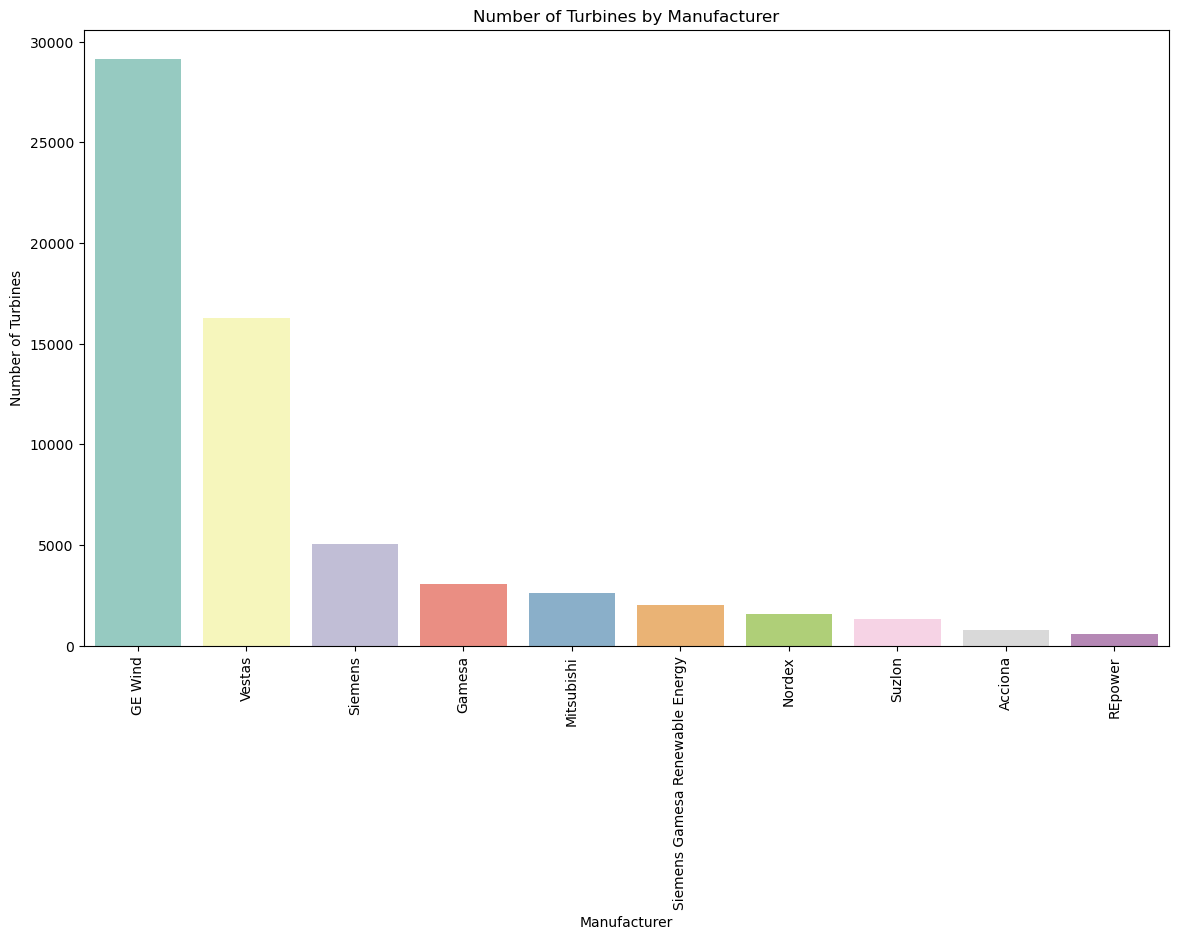

In [17]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Manufacturer', y='Turbine Count', data=manufacturer_counts, palette="Set3")
plt.title('Number of Turbines by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Turbines')
plt.xticks(rotation=90)
plt.show()

## Model

In [26]:
model_counts = wind['model'].value_counts().reset_index().head(20)
model_counts.columns = ['Model', 'Turbine Count']

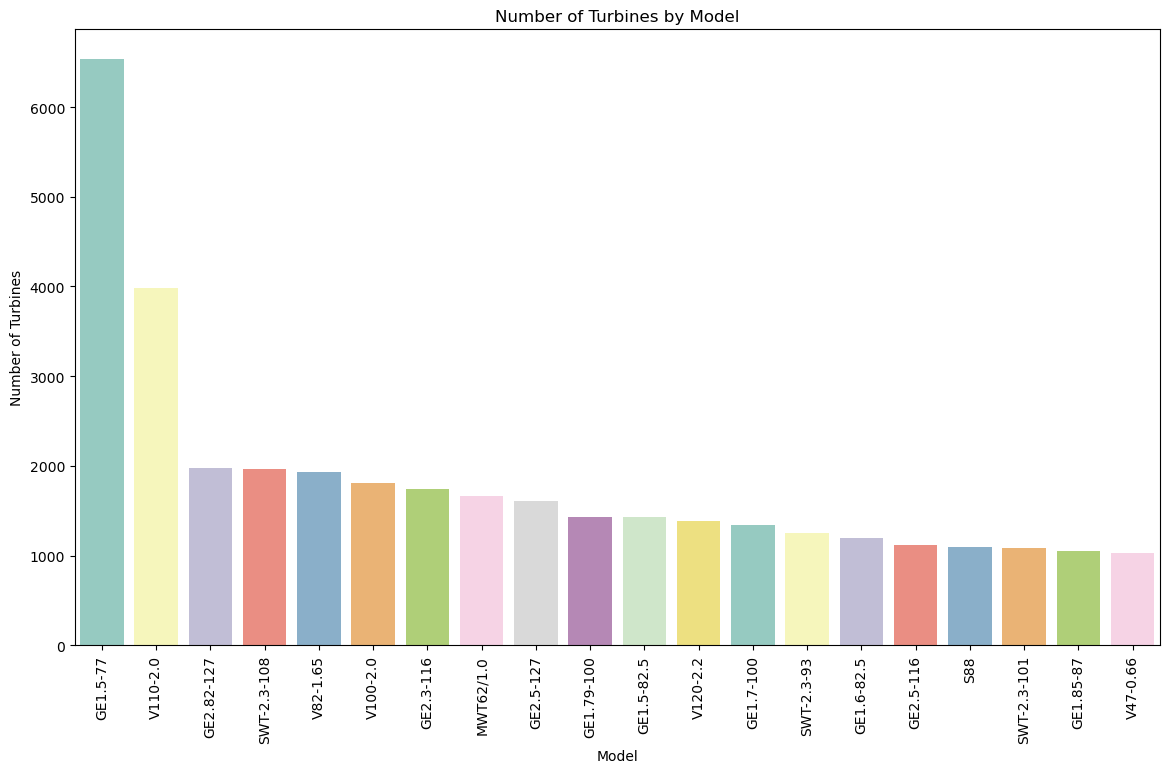

In [29]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Turbine Count', data=model_counts, palette="Set3")
plt.title('Number of Turbines by Model')
plt.xlabel('Model')
plt.ylabel('Number of Turbines')
plt.xticks(rotation=90)
plt.show()

## Operator Count - Energy 

In [31]:
operator_counts = energy['Operator_Name'].value_counts().reset_index().head(20)
operator_counts.columns = ['Operator', 'Row Count']

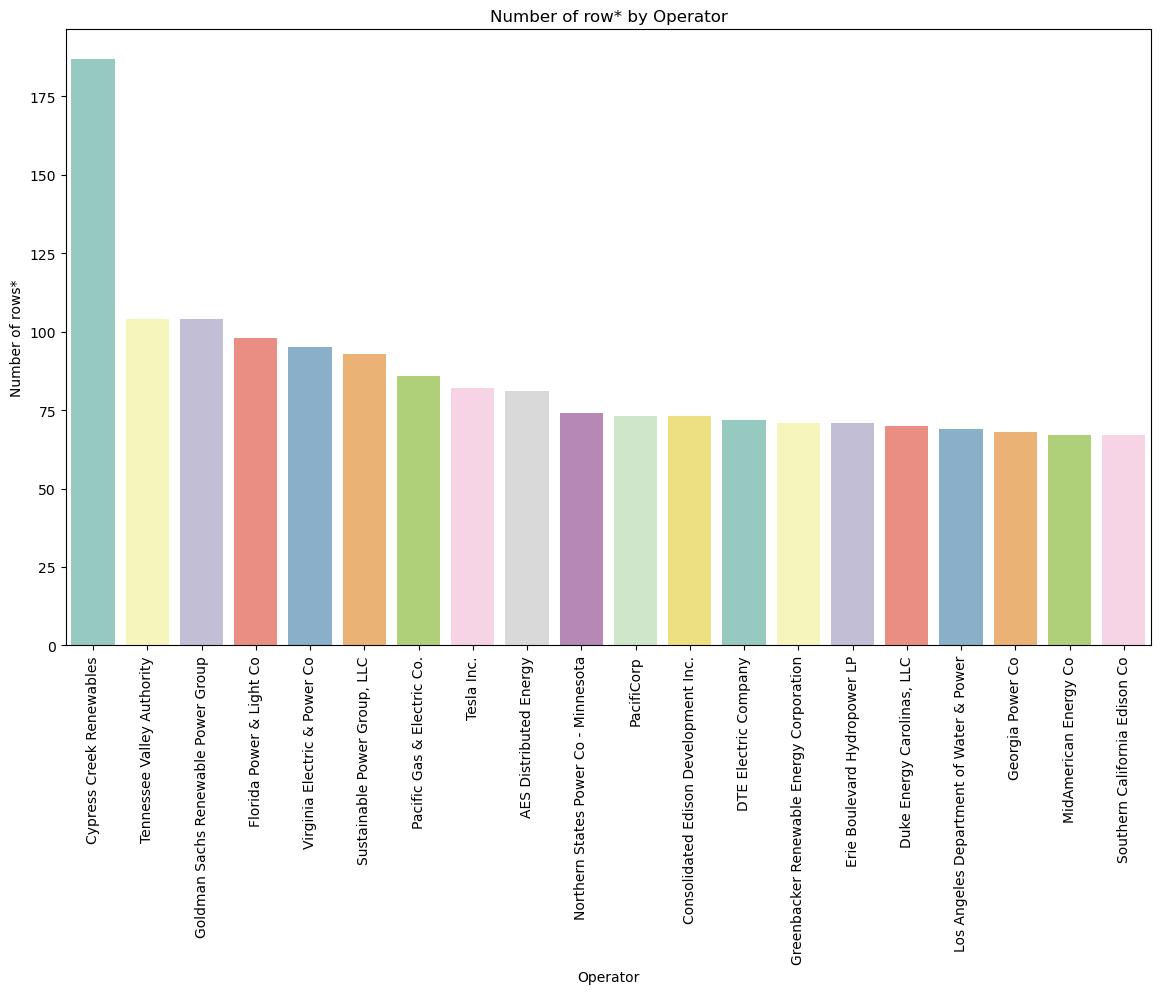

In [32]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Operator', y='Row Count', data=operator_counts, palette="Set3")
plt.title('Number of row* by Operator')
plt.xlabel('Operator')
plt.ylabel('Number of rows*')
plt.xticks(rotation=90)
plt.show()

## join energy onto wind

first change the column name

In [36]:
wind.rename(columns={'eia_id':'Plant_Id'
            } , inplace=True)
wind.sample()

,case_id,Plant_Id,state,county,wind_farm,year,turbine_count,project_capacity,manufact,model,turbine_capacity,hub_height,rotor_diameter,rotor_swept_area,total_height,retrofit,retrofit_year,conf_atr,conf_loc,img_date,img_source,long,lat
67503,3097390,NaN,CA,Kern County,unknown Kern County,2021.0,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,3,2021-02-20,Digital Globe,-118.356224,35.093552


In [40]:
wind_wop = pd.merge(left = wind, right = energy, how = 'left', on = 'Plant_Id')
wind_wop.sample()

,case_id,Plant_Id,state,county,wind_farm,year,turbine_count,project_capacity,manufact,model,turbine_capacity,hub_height,rotor_diameter,rotor_swept_area,total_height,retrofit,retrofit_year,conf_atr,conf_loc,img_date,img_source,long,lat,Unnamed: 0,Combined_Heat_And\nPower_Plant,Nuclear_Unit_Id,Plant_Name,Operator_Name,Operator_Id,Plant_State,Census_Region,NERC_Region,Reserved,NAICS_Code,EIA_Sector_Number,Sector_Name,Reported\nPrime_Mover,Reported\nFuel_Type_Code,AER\nFuel_Type_Code,Balancing\nAuthority_Code,Respondent\nFrequency,Physical\nUnit_Label,Quantity\nJanuary,Quantity\nFebruary,Quantity\nMarch,Quantity\nApril,Quantity\nMay,Quantity\nJune,Quantity\nJuly,Quantity\nAugust,Quantity\nSeptember,Quantity\nOctober,Quantity\nNovember,Quantity\nDecember,Elec_Quantity\nJanuary,Elec_Quantity\nFebruary,Elec_Quantity\nMarch,Elec_Quantity\nApril,Elec_Quantity\nMay,Elec_Quantity\nJune,Elec_Quantity\nJuly,Elec_Quantity\nAugust,Elec_Quantity\nSeptember,Elec_Quantity\nOctober,Elec_Quantity\nNovember,Elec_Quantity\nDecember,MMBtuPer_Unit\nJanuary,MMBtuPer_Unit\nFebruary,MMBtuPer_Unit\nMarch,MMBtuPer_Unit\nApril,MMBtuPer_Unit\nMay,MMBtuPer_Unit\nJune,MMBtuPer_Unit\nJuly,MMBtuPer_Unit\nAugust,MMBtuPer_Unit\nSeptember,MMBtuPer_Unit\nOctober,MMBtuPer_Unit\nNovember,MMBtuPer_Unit\nDecember,Tot_MMBtu\nJanuary,Tot_MMBtu\nFebruary,Tot_MMBtu\nMarch,Tot_MMBtu\nApril,Tot_MMBtu\nMay,Tot_MMBtu\nJune,Tot_MMBtu\nJuly,Tot_MMBtu\nAugust,Tot_MMBtu\nSeptember,Tot_MMBtu\nOctober,Tot_MMBtu\nNovember,Tot_MMBtu\nDecember,Elec_MMBtu\nJanuary,Elec_MMBtu\nFebruary,Elec_MMBtu\nMarch,Elec_MMBtu\nApril,Elec_MMBtu\nMay,Elec_MMBtu\nJune,Elec_MMBtu\nJuly,Elec_MMBtu\nAugust,Elec_MMBtu\nSeptember,Elec_MMBtu\nOctober,Elec_MMBtu\nNovember,Elec_MMBtu\nDecember,Netgen\nJanuary,Netgen\nFebruary,Netgen\nMarch,Netgen\nApril,Netgen\nMay,Netgen\nJune,Netgen\nJuly,Netgen\nAugust,Netgen\nSeptember,Netgen\nOctober,Netgen\nNovember,Netgen\nDecember,Total_Fuel_Consumption\nQuantity,Electric_Fuel_Consumption\nQuantity,Total_Fuel_Consumption\nMMBtu,Elec_Fuel_Consumption\nMMBtu,Net_Generation\n(Megawatthours),YEAR
65169,3093578,62624.0,MO,Nodaway County,White Cloud,2020.0,89,236.5,Siemens Gamesa Renewable Energy,SG 2.75-129,2750.0,109.0,129.0,13069.81,173.4,0,NaN,3,3,2021-01-17,Digital Globe,-95.003799,40.328922,13798.0,N,0.0,"White Cloud Wind Project, LLC","White Cloud Wind Project, LLC",62079.0,MO,WNC,MRO,NaN,22.0,2.0,NAICS-22 Non-Cogen,WT,WND,WND,AECI,M,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,541584.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,541584.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61733.0,0.0,0.0,541584.0,541584.0,61733.0,2020.0


In [55]:
wind_wop[['case_id', 'Plant_Id', 'manufact', 'model', 'Operator_Name']]

,case_id,Plant_Id,manufact,model,Operator_Name
0,3072661,52161.0,Vestas,NaN,Terra-Gen Operating Co-Wind
1,3072695,52161.0,Vestas,NaN,Terra-Gen Operating Co-Wind
2,3072704,52161.0,Vestas,NaN,Terra-Gen Operating Co-Wind
3,3063272,NaN,Nordex,AW125/3000,NaN
4,3053390,NaN,Nordex,AW125/3000,NaN
...,...,...,...,...,...
71207,3113125,NaN,NaN,NaN,NaN
71208,3053232,NaN,NaN,NaN,NaN
71209,3040944,NaN,NaN,NaN,NaN
71210,3055918,NaN,NaN,NaN,NaN


In [57]:
wind_wop[['case_id', 'Plant_Id', 'manufact', 'model', 'Operator_Name']].isnull().sum().sort_values(ascending=False)

Operator_Name    7950
Plant_Id         5182
model            5167
manufact         5031
case_id             0
dtype: int64

From above - review each seperately. As there are an inconstitant amount of Nulls

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

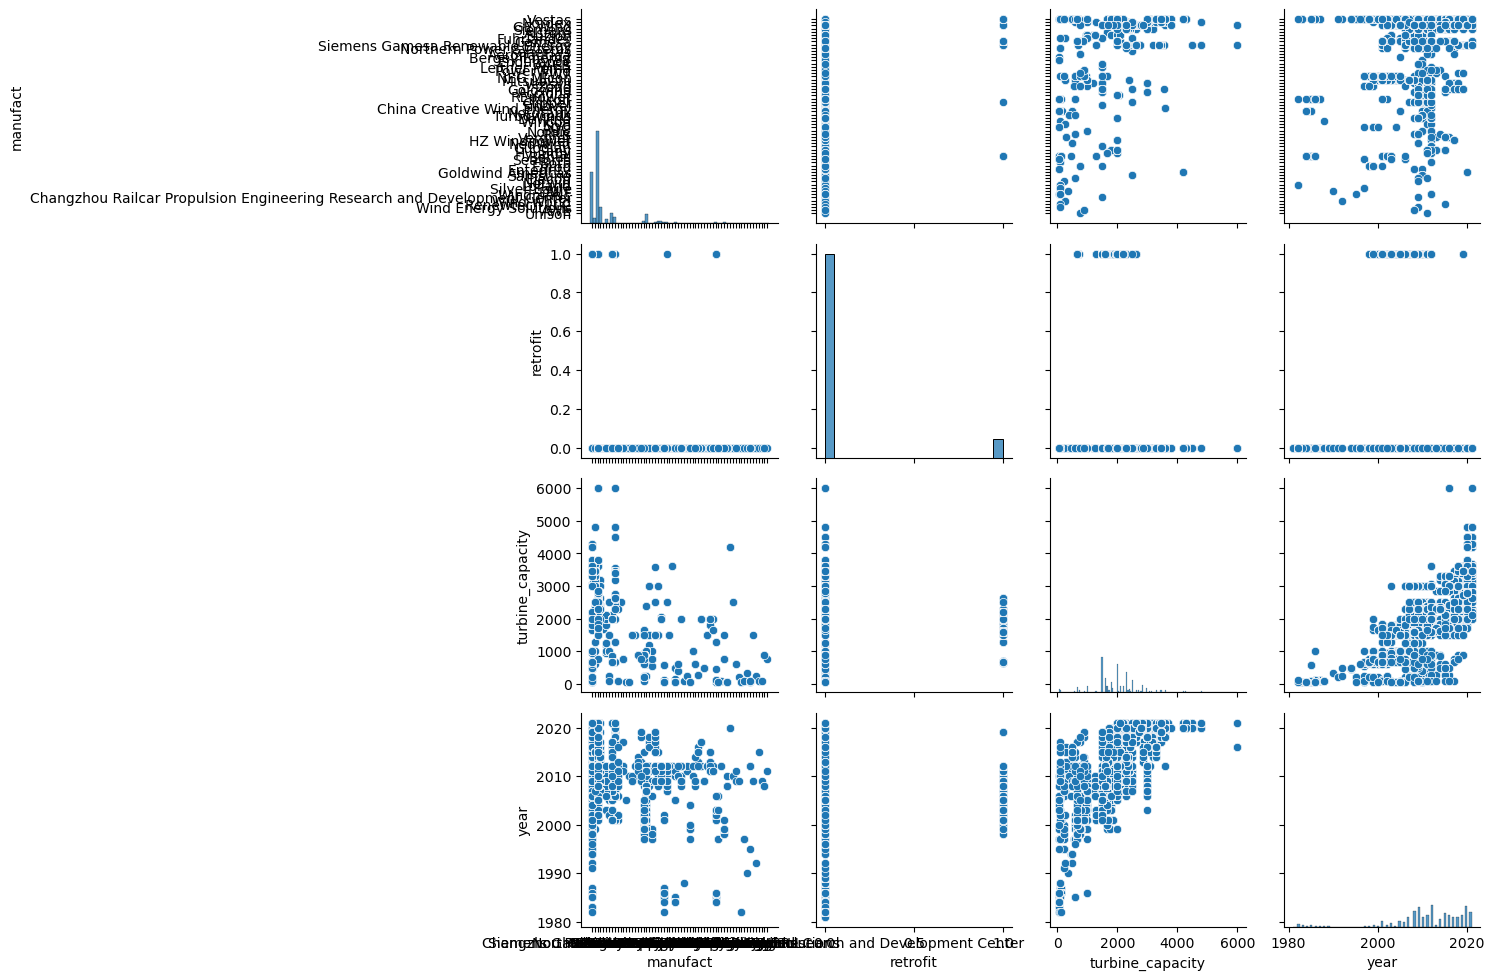

In [61]:
sns.pairplot(wind_wop, vars=['manufact','retrofit','turbine_capacity','year']);

In [62]:
wind_wop.to_csv('windwop_new.csv')